# 1. Setup

In [2]:
# some imports
import sys
import os
import MCMC_Noddy as mcmc     
from glob import glob
import vedo as vtkP

# give correct permissions to the executable
folder = os.getcwd()
noddyEXE = folder+'/noddy_linux.exe'
strV = 'chmod 777 '+noddyEXE
os.system(strV)

0

# 2. Choose hyper parameters

In [2]:
HyperParameters = {}

HyperParameters['ScenarioNum'] = 18
HyperParameters['SimulationShiftType'] = 'Median Datum Shift'
HyperParameters['DatNormMethod'] = 'MedianInitialRounds'
HyperParameters['ExplorationRate'] = 'LinearErrorBased'
HyperParameters['ErrorType'] = 'Global'
HyperParameters['ErrorNorm'] = 'L1'
HyperParameters['ExplorationStage'] = 'Explore'
HyperParameters['AcceptProbType'] = 'Track Acceptance'
HyperParameters['cubesize'] = 150
HyperParameters['AcceptanceGoal'] = 0.2
HyperParameters['ConstNormFactor'] = 0.01
HyperParameters['GlobalMoveEachDir'] = 500
HyperParameters['XYZ_Axes_StepStd'] = 100
HyperParameters['Dip_StepStd'] = 5
HyperParameters['Slip_StepStd'] = 50
HyperParameters['DipDirection_StepStd'] = 6
HyperParameters['SlipParam'] = 0.1
HyperParameters['SteppingSizeMult'] = 1/0.9
HyperParameters['MaxFaultMarkerError'] = 525
HyperParameters['AmplitudeRatioChange'] = 0.1
HyperParameters['AzimuthMoveEachDirection'] = 6
HyperParameters['AxisRatioChange'] = 0.1
HyperParameters['DipMoveEachDirection'] = 32
HyperParameters['nExploreRuns'] = 50
HyperParameters['MO_WeightingMethod'] = 'Proportions'
HyperParameters['MCMC_SwitchWeightFreq'] = 20
HyperParameters['LocalWeightsMode'] = 'na'

Thread_num = 0 
HyperParameters['thread_num'] = Thread_num        
HyperParameters['Toy']=False
HyperParameters['verbose']=True
HyperParameters['nruns']=200
HyperParameters['BaseFolder']='Combo_Scratch'
HyperParameters['GeneralPerturbStrategy']='OnlyGlobal'
HyperParameters['ControlPointMovementUnits'] = 'Absolute value'
HyperParameters['errCalcMethodFaultMarker']= 'Distance'
HyperParameters['DataTypes'] = ['Grav', 'Mag', 'GT', 'FaultMarkers']
HyperParameters['JoinType']='LINES'
HyperParameters['xy_origin']=[316448, 4379166, -2700]
HyperParameters['xy_extent'] = [8850, 9000,3900]
HyperParameters['DatNormCoef'] = {'Grav': 2.4, 'Tracer': 1.0, 
                        'FaultMarkers': 500, 'GT': 315, 'Mag':300}
HyperParameters['verbose']=True    
HyperParameters['graniteIdx'] = 4
HyperParameters['Windows'] = False
HyperParameters['jupyter'] = True

HyperParameters['OutputImageFreq'] = 15        
HyperParameters['OptimMethod']='MCMC'

# 3. Run and view results every x times (x=output image frequency)

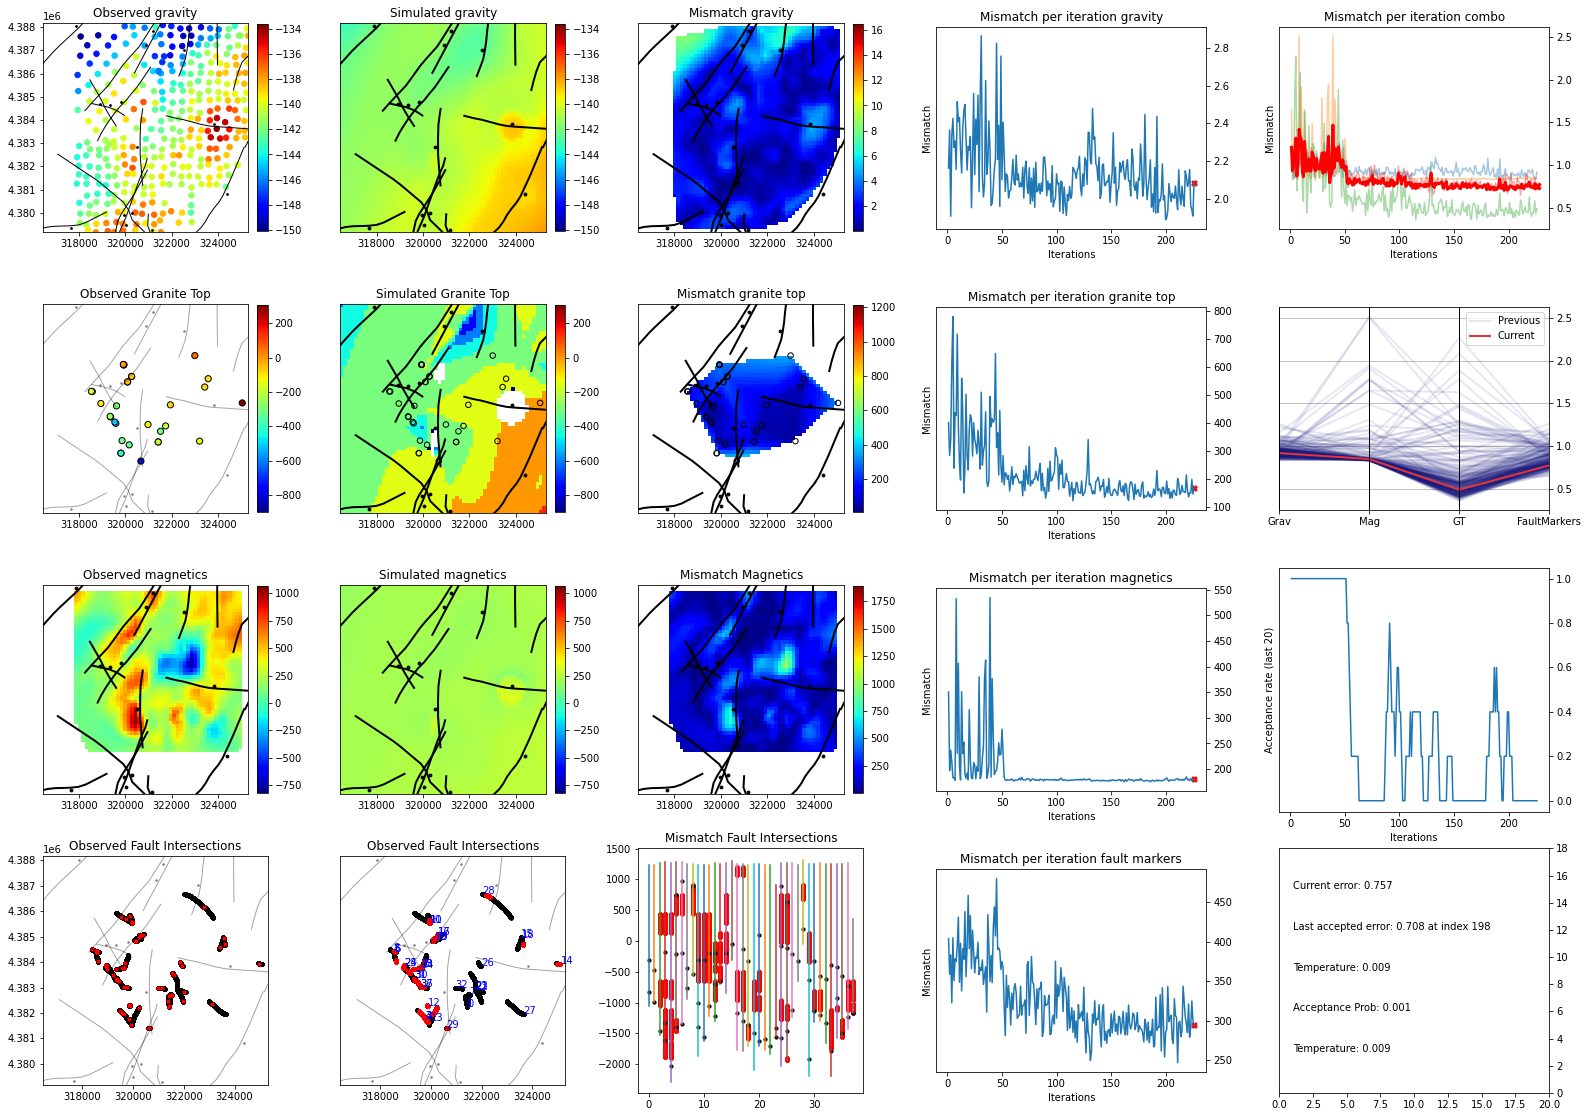

Run Number: 226
Finished calculating geology and topology
Finished calculating gravity and magnetics
normalizingFactor: 0.009968710614823056
acceptanceProbability: 0.004328168658244806
Accepted percentage: 0.336283185840708
Last Combo Error: 0.7621657185142161
Run Number: 227
Finished calculating geology and topology
Finished calculating gravity and magnetics
normalizingFactor: 0.010467146145564208
acceptanceProbability: 0.0024945938481923647
Accepted percentage: 0.33480176211453744
Last Combo Error: 0.7706461011096524
Run Number: 228
Finished calculating geology and topology
Finished calculating gravity and magnetics
normalizingFactor: 0.010990503452842419
acceptanceProbability: 0.0006338886683987506
Accepted percentage: 0.3333333333333333
Last Combo Error: 0.7888399870690586
Run Number: 229
Finished calculating geology and topology
Finished calculating gravity and magnetics
normalizingFactor: 0.01154002862548454
acceptanceProbability: 8.108959825330385e-06
Accepted percentage: 0.3318

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [3]:
if(HyperParameters['OptimMethod']=='MCMC'):
    mcmc.MCMC_Noddy(HyperParameters)

# 4. Find the model with least error

In [4]:
#Loop through all of the files and take the best and and another 5 random ones and copy them over
def GetIterationNumFromFile(file):
    result = re.search('G_(.*)_Err', file)
    return int(result.group(1))

def GetErrFromFile(file):
    result = re.search('Err_(.*).his', file)
    return float(result.group(1))

folder = os.getcwd()+'/Combo_Scratch/Thread'+str(Thread_num)+'/HistoryFileInspection/'
files = glob(folder+'*.his')
nFiles = len(files)

MasterFileList = []
ErrV=1000000.0
bestIter=0
for i in range(nFiles):
    file_i = files[i]
    print('reading: '+ file_i)
    Err=GetErrFromFile(file_i)
    Iter=GetIterationNumFromFile(file_i)
    if(Err<ErrV):
        ErrV = Err
        bestIter = Iter
        best_model_file = file_i

print('best file is: ' + best_model_file)

reading: /home/jovyan/code/Combo_Scratch/Thread0/HistoryFileInspection/His_0_G_120_Err_766.his
reading: /home/jovyan/code/Combo_Scratch/Thread0/HistoryFileInspection/His_0_G_15_Err_216939.his
reading: /home/jovyan/code/Combo_Scratch/Thread0/HistoryFileInspection/His_0_G_135_Err_782.his
reading: /home/jovyan/code/Combo_Scratch/Thread0/HistoryFileInspection/His_0_G_165_Err_744.his
reading: /home/jovyan/code/Combo_Scratch/Thread0/HistoryFileInspection/His_0_G_90_Err_757.his
reading: /home/jovyan/code/Combo_Scratch/Thread0/HistoryFileInspection/His_0_G_210_Err_738.his
reading: /home/jovyan/code/Combo_Scratch/Thread0/HistoryFileInspection/His_0_G_30_Err_266334.his
reading: /home/jovyan/code/Combo_Scratch/Thread0/HistoryFileInspection/His_0_G_180_Err_779.his
reading: /home/jovyan/code/Combo_Scratch/Thread0/HistoryFileInspection/His_0_G_150_Err_736.his
reading: /home/jovyan/code/Combo_Scratch/Thread0/HistoryFileInspection/His_0_G_75_Err_773.his
reading: /home/jovyan/code/Combo_Scratch/Thread0

# 5. Plot in 3D

In [1]:
import plot3d_util as plt3d
import vedo as vtkP

In [2]:
vtkP.settings.embedWindow('k3d') #you can also choose to change to itkwidgets, k3d, False (popup)


In [3]:
plot = vtkP.Plotter(axes=1, bg='white', interactive=1)


In [4]:
#Alter the mesh size if desiring to speed up the process. Recommended size is 100
output_name = 'noddy_out'
cubesize = 250
includeGravityCalc = 0
xy_origin=[317883,4379646, 1200-5000]

best_model_file = '/home/jovyan/code/Combo_Scratch/Thread0/HistoryFileInspection/His_0_G_195_Err_704.his'

plt3d.plot_3d_model(best_model_file, cubesize, plot)

plot.show(viewup='z')

Calculation time took 13.818308115005493 seconds
Parsing time took 6.112421035766602 seconds
The number of triangle elements (cells/faces) is: 132497
Convert 2 VTK time took 0.6297304630279541 seconds


Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera=[327826.19731552235…